In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [13]:
# [8.1]
# Combine instances in the Class1.txt and Class2.txt files as one dataframe, and label instances in Class1 as 2,
# and instances in Class2 as -2. [0.25 pt]

# Loading data from Class1.txt and Class2.txt
class1_data = np.genfromtxt('Class1.txt', delimiter=',', dtype=float, invalid_raise=False)
class2_data = np.genfromtxt('Class2.txt', delimiter=',', dtype=float, invalid_raise=False)

# Removing rows with missing or invalid values
class1_data = class1_data[~np.isnan(class1_data).any(axis=1)]
class2_data = class2_data[~np.isnan(class2_data).any(axis=1)]

# Creating labels for the classes
class1_labels = np.full((class1_data.shape[0], 1), 2)
class2_labels = np.full((class2_data.shape[0], 1), -2)

# Combining the instances and labels
combined_data = np.concatenate((class1_data, class1_labels), axis=1)
combined_data = np.concatenate((combined_data, np.concatenate((class2_data, class2_labels), axis=1)))

# Creating a dataframe from the combined data
column_names = ['x', 'y', 'label']
combined_df = pd.DataFrame(combined_data, columns=column_names)

# Printing the combined dataframe
print(combined_df)


         x      y  label
0    0.132  0.757    2.0
1    0.722  0.888    2.0
2    0.095  0.804    2.0
3    0.633  0.530    2.0
4    0.472  0.701    2.0
..     ...    ...    ...
195  0.052  0.385   -2.0
196  0.433  0.986   -2.0
197  0.357  0.554   -2.0
198  0.303  0.889   -2.0
199  0.061  0.814   -2.0

[200 rows x 3 columns]


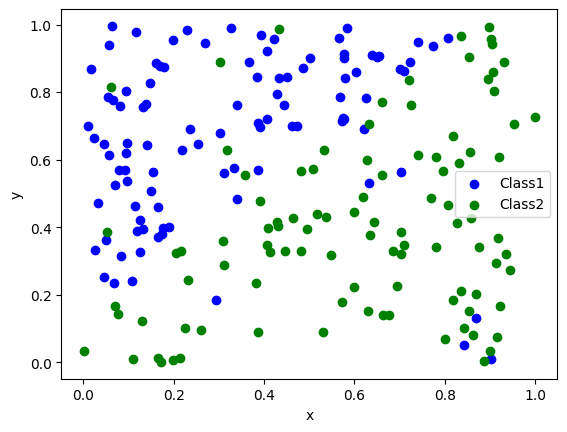

In [14]:
# [8.2] 
# Report the scatter plot of all 200 instances in the same plot, using “Blue” color to show instances in Class1 and 
# uses “Green” to show instances in Class 2 [0.25 pt]

# Scatter plot of Class1 instances (Blue color)
plt.scatter(class1_data[:, 0], class1_data[:, 1], color='blue', label='Class1')

# Scatter plot of Class2 instances (Green color)
plt.scatter(class2_data[:, 0], class2_data[:, 1], color='green', label='Class2')

# Setting plot labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Show the plot
plt.show()

In [15]:
#[8.3]
# Randomly select 80% instances from class1.txt and 80% instances from class2.txt to train a perceptron classifier
# (using gradient descent learning rule), and use the classifier to classify remaining 20% instances in class1.txt 
# and class2.txt. Report the classification accuracy of the perceptron classifier on the 20% test instances 
# (using learning rate=1/(# of training samples), error threshold 0.1, and iteration numbers 2000) [0.5 pt]

# Combining instances and labels from Class1.txt and Class2.txt
class1_data = np.loadtxt('Class1.txt', delimiter=',', skiprows=1)
class2_data = np.loadtxt('Class2.txt', delimiter=',', skiprows=1)

# Creating labels for Class1 and Class2
class1_labels = np.full((class1_data.shape[0], 1), 2)
class2_labels = np.full((class2_data.shape[0], 1), -2)


# Combining the instances and labels
combined_data = np.concatenate((class1_data, class1_labels), axis=1)
combined_data = np.concatenate((combined_data, np.concatenate((class2_data, class2_labels), axis=1)))

# Shuffle the combined data
np.random.shuffle(combined_data)

# Split data into training and test sets (80% training, 20% testing)
train_size = int(0.8 * combined_data.shape[0])
train_data = combined_data[:train_size, :]
test_data = combined_data[train_size:, :]

# Separate features (x) and labels (y) for training and testing
train_x = train_data[:, :2]
train_y = train_data[:, 2]
test_x = test_data[:, :2]
test_y = test_data[:, 2]

# Initialize the weights and bias with zeros
weights = np.zeros(2)
bias = 0.0

# Set the learning rate, error threshold, and iteration numbers
learning_rate = 1 / train_size
error_threshold = 0.1
num_iterations = 2000

# Train the perceptron classifier using gradient descent
for _ in range(num_iterations):
    errors = 0

    for i in range(train_size):
        # Compute the predicted value
        predicted = np.dot(weights, train_x[i]) + bias

        # Update the weights and bias if the prediction is incorrect
        if predicted * train_y[i] <= 0:
            weights += learning_rate * train_y[i] * train_x[i]
            bias += learning_rate * train_y[i]
            errors += 1

    # Check if the total error is below the threshold
    if errors == 0 or errors / train_size < error_threshold:
        break

# Test the perceptron classifier on the test instances
correct_predictions = 0

for i in range(test_x.shape[0]):
    predicted = np.dot(weights, test_x[i]) + bias

    # Classify instances based on the sign of the prediction
    if predicted > 0:
        predicted_label = 2
    else:
        predicted_label = -2

    # Check if the prediction matches the true label
    if predicted_label == test_y[i]:
        correct_predictions += 1

# Calculate the classification accuracy
accuracy = correct_predictions / test_x.shape[0] * 100

# Printing the classification accuracy
print("Perceptron Classifier Accuracy: {:.2f}%".format(accuracy))


Perceptron Classifier Accuracy: 85.00%


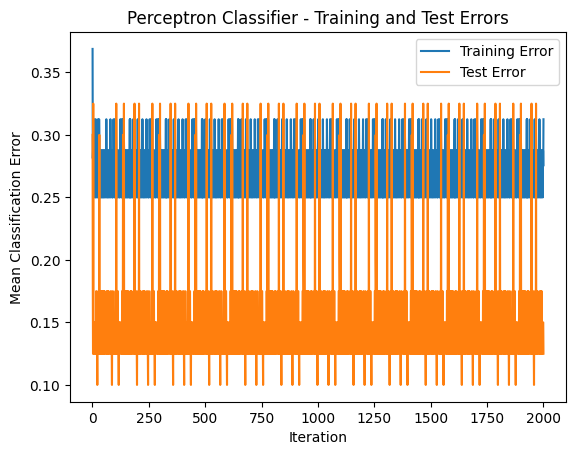

In [20]:
# [8.4]
# Report training errors and test errors of the perceptron classifier with respect to each iteration. 
# Show the two error rates on the same chart, where the x-axis denotes the iteration and 
# the y-axis denotes the mean classification errors [0.5 pt]

# Combine instances and labels from Class1.txt and Class2.txt
class1_data = np.loadtxt('Class1.txt', delimiter=',', skiprows=1)
class2_data = np.loadtxt('Class2.txt', delimiter=',', skiprows=1)

# Create labels for Class1 and Class2
class1_labels = np.full((class1_data.shape[0], 1), 2)
class2_labels = np.full((class2_data.shape[0], 1), -2)

# Combine the instances and labels
combined_data = np.concatenate((class1_data, class1_labels), axis=1)
combined_data = np.concatenate((combined_data, np.concatenate((class2_data, class2_labels), axis=1)))

# Shuffle the combined data
np.random.shuffle(combined_data)

# Split data into training and test sets (80% training, 20% testing)
train_size = int(0.8 * combined_data.shape[0])
train_data = combined_data[:train_size, :]
test_data = combined_data[train_size:, :]

# Separate features (x) and labels (y) for training and testing
train_x = train_data[:, :2]
train_y = train_data[:, 2]
test_x = test_data[:, :2]
test_y = test_data[:, 2]

# Initialize the weights and bias with zeros
weights = np.zeros(2)
bias = 0.0

# Set the learning rate, error threshold, and iteration numbers
learning_rate = 1 / train_size
error_threshold = 0.1
num_iterations = 2000

# Track training and test errors
train_errors = []
test_errors = []

# Train the perceptron classifier using gradient descent
for iteration in range(num_iterations):
    train_errors_count = 0

    for i in range(train_size):
        # Compute the predicted value
        predicted = np.dot(weights, train_x[i]) + bias

        # Update the weights and bias if the prediction is incorrect
        if predicted * train_y[i] <= 0:
            weights += learning_rate * train_y[i] * train_x[i]
            bias += learning_rate * train_y[i]
            train_errors_count += 1

    # Calculate the classification error rate for training data
    train_error_rate = train_errors_count / train_size

    # Track the training error rate for each iteration
    train_errors.append(train_error_rate)

    # Test the perceptron classifier on the test instances
    test_errors_count = 0

    for i in range(test_x.shape[0]):
        predicted = np.dot(weights, test_x[i]) + bias

        # Classify instances based on the sign of the prediction
        if predicted > 0:
            predicted_label = 2
        else:
            predicted_label = -2

        # Check if the prediction matches the true label
        if predicted_label != test_y[i]:
            test_errors_count += 1

    # Calculate the classification error rate for test data
    test_error_rate = test_errors_count / test_x.shape[0]

    # Track the test error rate for each iteration
    test_errors.append(test_error_rate)

    # Check if the total error is below the threshold
    if train_errors_count == 0 or train_error_rate < error_threshold:
        break

# Plot the training and test errors
iterations = range(1, len(train_errors) + 1)

plt.plot(iterations, train_errors, label='Training Error')
plt.plot(iterations, test_errors, label='Test Error')

plt.xlabel('Iteration')
plt.ylabel('Mean Classification Error')
plt.title('Perceptron Classifier - Training and Test Errors')
plt.legend()
plt.show()

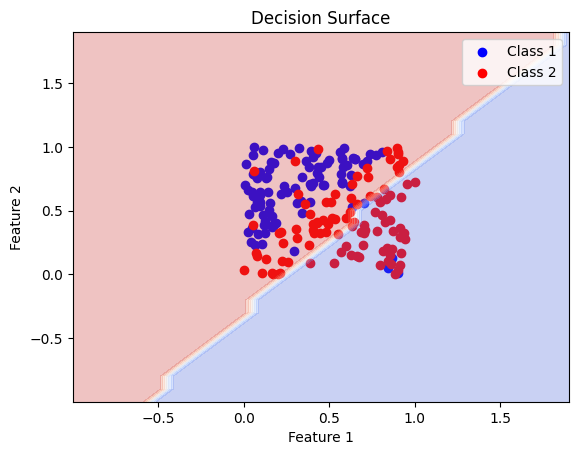

In [17]:
# [8.5]
# Report the final decision surface on the same scatter plot which shows the 200 instances [0.5 pt]

# Combine instances and labels from Class1.txt and Class2.txt
class1_data = np.loadtxt('Class1.txt', delimiter=',', skiprows=1)
class2_data = np.loadtxt('Class2.txt', delimiter=',', skiprows=1)

# Create labels for Class1 and Class2
class1_labels = np.full((class1_data.shape[0], 1), 2)
class2_labels = np.full((class2_data.shape[0], 1), -2)

# Combine the instances and labels
combined_data = np.concatenate((class1_data, class1_labels), axis=1)
combined_data = np.concatenate((combined_data, np.concatenate((class2_data, class2_labels), axis=1)))

# Shuffle the combined data
np.random.shuffle(combined_data)

# Separate features (x) and labels (y)
x = combined_data[:, 0:2]
y = combined_data[:, 2]

# Split data into training and test sets (80% training, 20% testing)
train_size = int(0.8 * combined_data.shape[0])
x_train = x[:train_size]
y_train = y[:train_size]
x_test = x[train_size:]
y_test = y[train_size:]

# Define the Perceptron class
class Perceptron:
    def __init__(self, learning_rate, error_threshold, iterations):
        self.learning_rate = learning_rate
        self.error_threshold = error_threshold
        self.iterations = iterations
        self.weights = None
        self.bias = None
        self.train_errors = []

    def fit(self, X, y):
        # Initialize weights and bias
        self.weights = np.zeros(X.shape[1])
        self.bias = 0.0

        # Train the perceptron
        for _ in range(self.iterations):
            errors = 0
            for xi, target in zip(X, y):
                update = self.learning_rate * (target - self.predict(xi))
                self.weights += update * xi
                self.bias += update
                errors += int(update != 0.0)
            self.train_errors.append(errors / X.shape[0])
            if errors == 0 or errors / X.shape[0] < self.error_threshold:
                break

    def predict(self, X):
        return np.where(np.dot(X, self.weights) + self.bias >= 0.0, 2, -2)

# Create an instance of the Perceptron classifier
learning_rate = 1 / train_size
error_threshold = 0.1
iterations = 2000
perceptron = Perceptron(learning_rate, error_threshold, iterations)

# Train the Perceptron classifier
perceptron.fit(x_train, y_train)

# Create a meshgrid to visualize the decision surface
x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1
x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1),
                       np.arange(x2_min, x2_max, 0.1))
grid_points = np.c_[xx1.ravel(), xx2.ravel()]

# Make predictions on the grid points
predictions = perceptron.predict(grid_points)

# Reshape predictions to match the grid dimensions
predictions = predictions.reshape(xx1.shape)

# Plot the scatter plot of instances
plt.scatter(class1_data[:, 0], class1_data[:, 1], color='blue', label='Class 1')
plt.scatter(class2_data[:, 0], class2_data[:, 1], color='red', label='Class 2')

# Plot the decision surface
plt.contourf(xx1, xx2, predictions, alpha=0.3, cmap='coolwarm')

# Set the labels and title of the plot
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Surface')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()



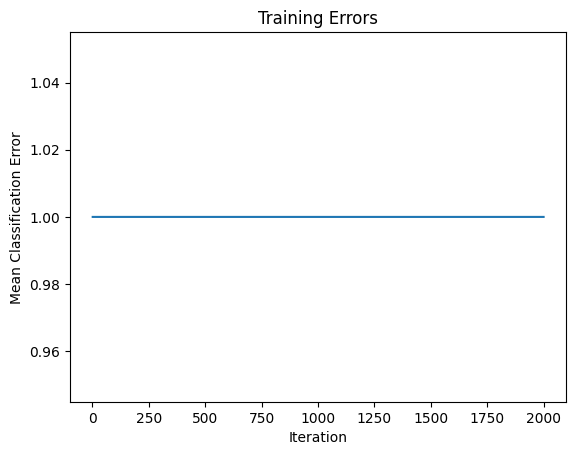

In [21]:
# [8.6]
# Please use Delta rule function in the Gradient Descent Learning [Notebook, pdf] to learn from the same 80% of training samples 
#(using learning rate =0.01, error threshold 0.1, and iteration numbers 2000).

# [8.6(a)]
# Report the training errors as a plot, where the x-axis denotes the iteration and the y-axis denotes the mean classification errors [0.5 pt]



# Combine instances and labels from Class1.txt and Class2.txt
class1_data = np.loadtxt('Class1.txt', delimiter=',', skiprows=1)
class2_data = np.loadtxt('Class2.txt', delimiter=',', skiprows=1)

# Create labels for Class1 and Class2
class1_labels = np.full((class1_data.shape[0], 1), 2)
class2_labels = np.full((class2_data.shape[0], 1), -2)

# Combine the instances and labels
combined_data = np.concatenate((class1_data, class1_labels), axis=1)
combined_data = np.concatenate((combined_data, np.concatenate((class2_data, class2_labels), axis=1)))

# Shuffle the combined data
np.random.shuffle(combined_data)

# Separate features (x) and labels (y)
x = combined_data[:, 0:2]
y = combined_data[:, 2]

# Split data into training and test sets (80% training, 20% testing)
train_size = int(0.8 * combined_data.shape[0])
x_train = x[:train_size]
y_train = y[:train_size]

# Define the Delta rule function
def delta_rule(x, y, learning_rate, error_threshold, iterations):
    num_features = x.shape[1]
    num_samples = x.shape[0]
    weights = np.random.uniform(-1, 1, num_features)
    bias = np.random.uniform(-1, 1)

    train_errors = []
    for _ in range(iterations):
        errors = 0
        for i in range(num_samples):
            xi = x[i]
            target = y[i]
            activation = np.dot(xi, weights) + bias
            error = target - activation
            weights += learning_rate * error * xi
            bias += learning_rate * error
            errors += int(error != 0.0)
        train_errors.append(errors / num_samples)
        if errors == 0 or errors / num_samples < error_threshold:
            break

    return weights, bias, train_errors

# Set the learning rate, error threshold, and number of iterations
learning_rate = 0.01
error_threshold = 0.1
iterations = 2000

# Learn from the training samples using the Delta rule
weights, bias, train_errors = delta_rule(x_train, y_train, learning_rate, error_threshold, iterations)

# Plot the training errors
plt.plot(range(1, len(train_errors) + 1), train_errors)
plt.xlabel('Iteration')
plt.ylabel('Mean Classification Error')
plt.title('Training Errors')
plt.show()


In [19]:
# [8.6 (b)]
# Compare Delta learning rule and Gradient Descent Learning rule, explain the advantage and disadvantage of each of
# them, respectively [0.5 pt] 


print("""

Delta Learning Rule:

- Advantage: The Delta learning rule is a simple and computationally efficient algorithm. It updates the weights incrementally based on the difference between the predicted output and the target output, making it suitable for online learning scenarios.

- Disadvantage: The Delta learning rule is sensitive to the initial weights and the order of the training samples. It can converge slowly or get stuck in local minima if the data is not linearly separable or if the learning rate is not properly chosen.

Gradient Descent Learning Rule:

- Advantage: The Gradient Descent learning rule is a general optimization algorithm that can be applied to a wide range of models and loss functions. It provides a systematic way to find the optimal weights by iteratively updating them in the direction of steepest descent. It can handle non-linearly separable data and has the potential to converge to the global minimum of the loss function.

- Disadvantage: The Gradient Descent learning rule can be computationally expensive, especially when dealing with large datasets or complex models. It requires computing the gradients of the loss function with respect to all the weights, which can be time-consuming. Additionally, the choice of learning rate is crucial, as a high learning rate can lead to overshooting the optimal solution, while a low learning rate can result in slow convergence.

We can say that he Delta learning rule is a simple and efficient algorithm suitable for online learning, but it may have limitations in terms of convergence and sensitivity to initialization. On the other hand, the Gradient Descent learning rule is a more versatile optimization algorithm that can handle complex models and non-linearly separable data, but it requires careful tuning of the learning rate and can be computationally expensive.
""")



Delta Learning Rule:

- Advantage: The Delta learning rule is a simple and computationally efficient algorithm. It updates the weights incrementally based on the difference between the predicted output and the target output, making it suitable for online learning scenarios.

- Disadvantage: The Delta learning rule is sensitive to the initial weights and the order of the training samples. It can converge slowly or get stuck in local minima if the data is not linearly separable or if the learning rate is not properly chosen.

Gradient Descent Learning Rule:

- Advantage: The Gradient Descent learning rule is a general optimization algorithm that can be applied to a wide range of models and loss functions. It provides a systematic way to find the optimal weights by iteratively updating them in the direction of steepest descent. It can handle non-linearly separable data and has the potential to converge to the global minimum of the loss function.

- Disadvantage: The Gradient Descent lea